In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Dataset

data = pd.read_csv('Regulatory Affairs of Road Accident Data 2020 India.csv')
data

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0
...,...,...,...,...,...
9545,Vizaq,Weather,Sunny/Clear,Greviously Injured,561.0
9546,Vizaq,Weather,Sunny/Clear,Minor Injury,252.0
9547,Vizaq,Weather,Sunny/Clear,Persons Killed,176.0
9548,Vizaq,Weather,Sunny/Clear,Total number of Accidents,1207.0


In [3]:
# Display the first few rows of the dataset
print(data.head())


# Display the last few rows of the dataset
data.tail()


  Million Plus Cities   Cause category        Cause Subcategory  \
0                Agra  Traffic Control  Flashing Signal/Blinker   
1                Agra  Traffic Control  Flashing Signal/Blinker   
2                Agra  Traffic Control  Flashing Signal/Blinker   
3                Agra  Traffic Control  Flashing Signal/Blinker   
4                Agra  Traffic Control  Flashing Signal/Blinker   

         Outcome of Incident  Count  
0         Greviously Injured    0.0  
1               Minor Injury    0.0  
2             Persons Killed    0.0  
3              Total Injured    0.0  
4  Total number of Accidents    0.0  


,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
9545,Vizaq,Weather,Sunny/Clear,Greviously Injured,561.0
9546,Vizaq,Weather,Sunny/Clear,Minor Injury,252.0
9547,Vizaq,Weather,Sunny/Clear,Persons Killed,176.0
9548,Vizaq,Weather,Sunny/Clear,Total number of Accidents,1207.0
9549,Vizaq,Weather,Sunny/Clear,Total Injured,813.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [5]:
data.shape

(9550, 5)

In [6]:
# data cleaning process

# Check for missing values
print(data.isnull().sum())

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64


In [7]:
# Fill missing values in the 'Count' column with 0
df_cleaned = data.fillna(0)

# Verify the cleaning process
df_cleaned.isnull().sum()


Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  0
dtype: int64

In [8]:
print(data.duplicated().sum())

# Drop duplicates if any
data.drop_duplicates(inplace=True)

0


# Exploratory Data Analysis (EDA)

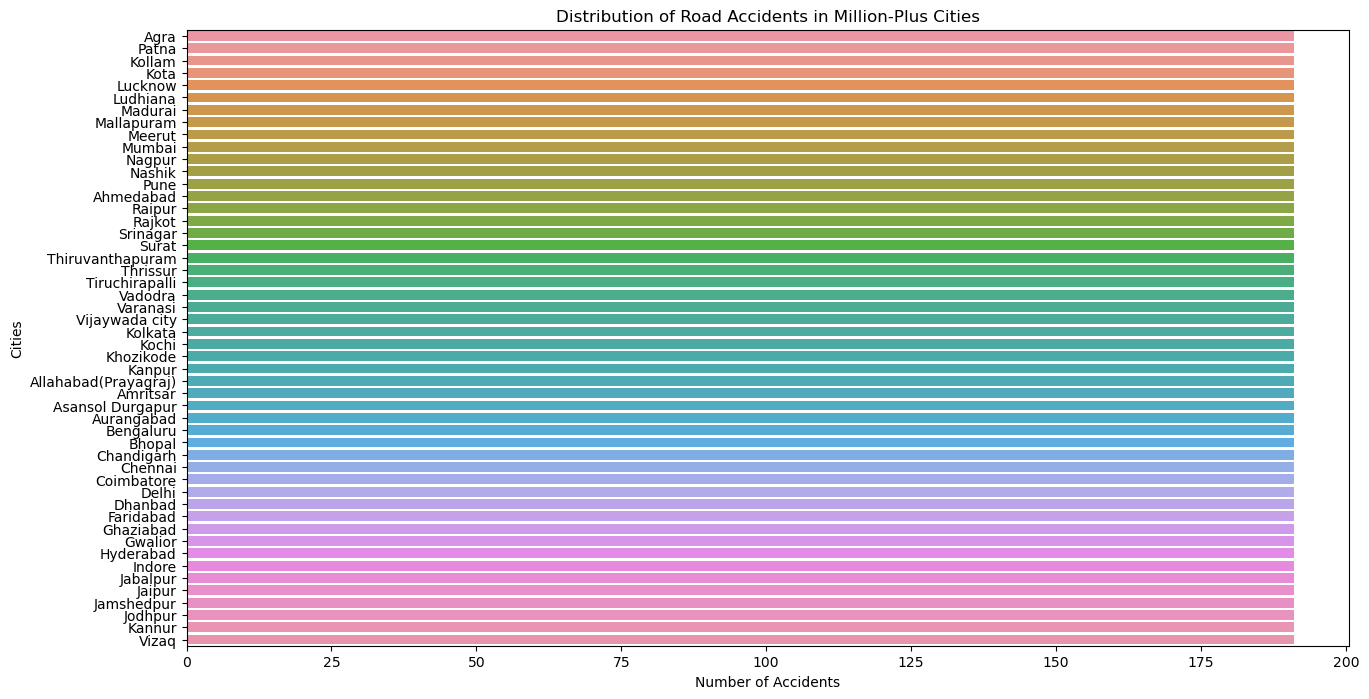

In [9]:
# Distribution of Accidents Across Cities

import matplotlib.pyplot as plt
import seaborn as sns
# Plot the distribution of accidents by city
plt.figure(figsize=(15,8))
sns.countplot(y='Million Plus Cities', data=df_cleaned,
order=df_cleaned['Million Plus Cities'].value_counts().index)
plt.title('Distribution of Road Accidents in Million-Plus Cities')
plt.xlabel('Number of Accidents')
plt.ylabel('Cities')
plt.show()


# Analysis of Accident Causes

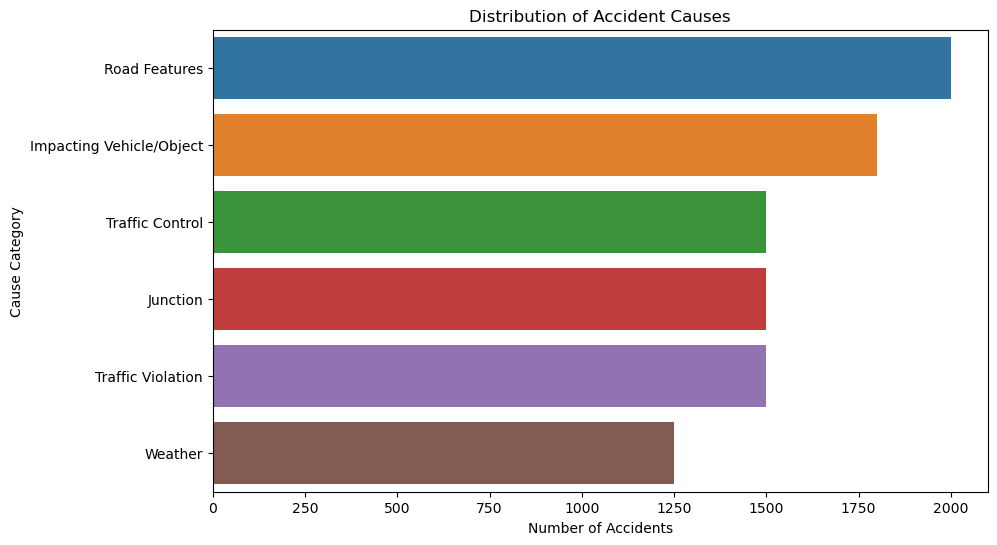

In [10]:
# Plot the distribution of accidents by cause category
plt.figure(figsize=(10,6))
sns.countplot(y='Cause category', data=df_cleaned,
order=df_cleaned['Cause category'].value_counts().index)
plt.title('Distribution of Accident Causes')
plt.xlabel('Number of Accidents')
plt.ylabel('Cause Category')
plt.show()


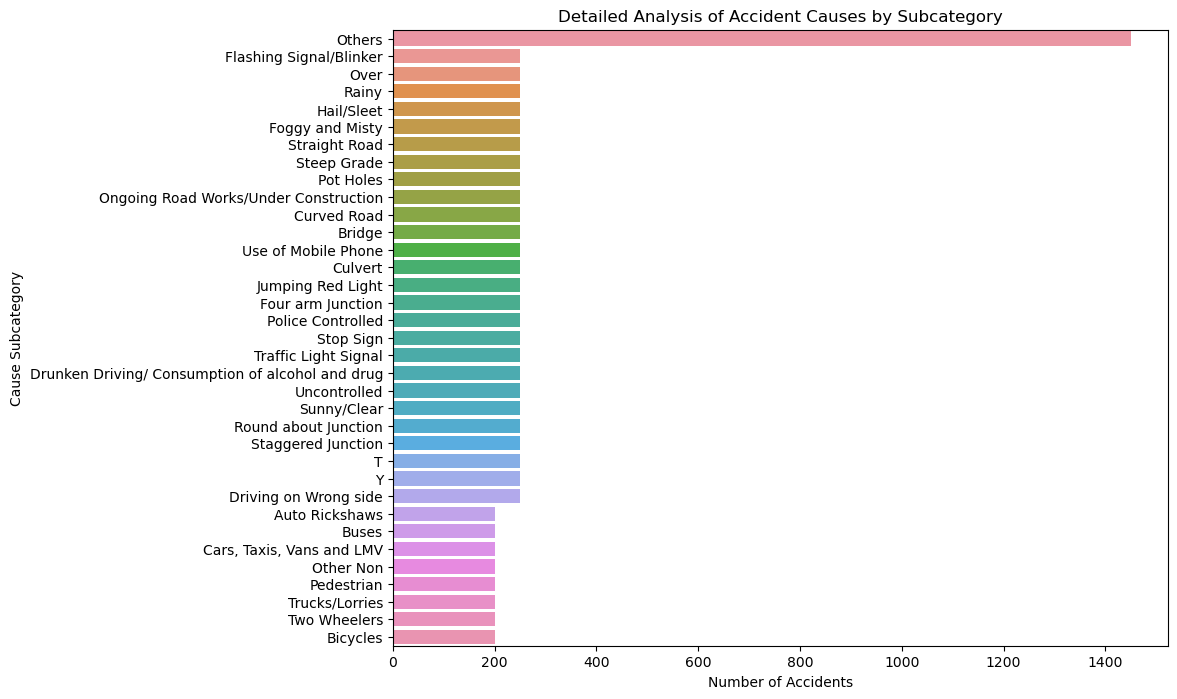

In [11]:
# Detailed analysis by cause subcategory
plt.figure(figsize=(10,8))
sns.countplot(y='Cause Subcategory', data=df_cleaned, order=df_cleaned['Cause Subcategory'].value_counts().index)
plt.title('Detailed Analysis of Accident Causes by Subcategory')
plt.xlabel('Number of Accidents')
plt.ylabel('Cause Subcategory')
plt.show()

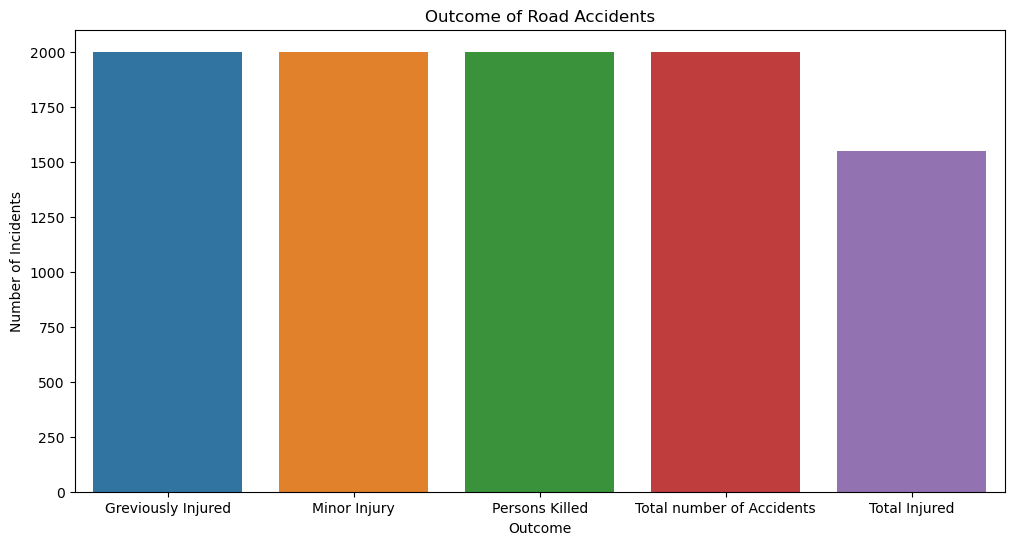

In [12]:
# Plot the outcomes of incidents
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome of Incident', data=df_cleaned, order=df_cleaned['Outcome of Incident'].value_counts().index)
plt.title('Outcome of Road Accidents')
plt.xlabel('Outcome')
plt.ylabel('Number of Incidents')
plt.show()


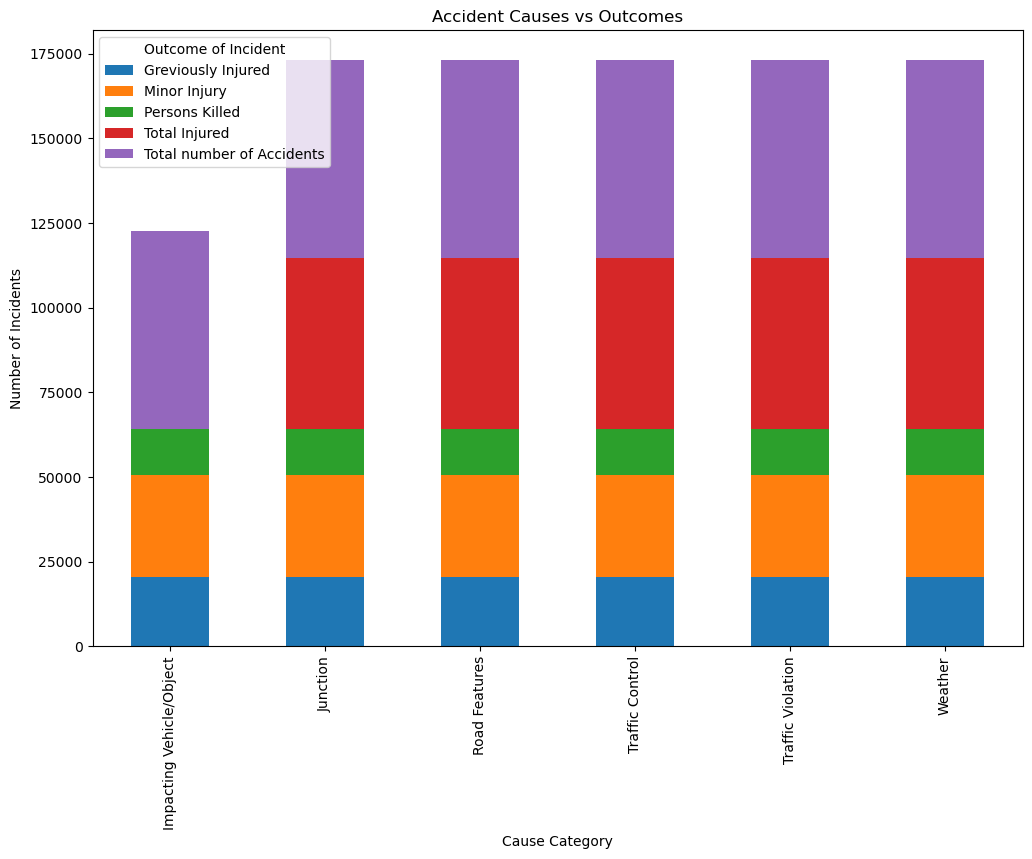

In [13]:
# Group by cause category and outcome
outcome_vs_cause = df_cleaned.groupby(['Cause category', 'Outcome of Incident'])['Count'].sum().unstack()

# Plot the result
outcome_vs_cause.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Accident Causes vs Outcomes')
plt.xlabel('Cause Category')
plt.ylabel('Number of Incidents')
plt.show()



In [14]:
# Summary statistics to understand the scale of accidents
total_accidents_per_city = df_cleaned.groupby('Million Plus Cities')['Count'].sum()
average_accidents_per_cause = df_cleaned.groupby('Cause category')['Count'].mean()

# Display results
print(total_accidents_per_city)
print(average_accidents_per_cause)


Million Plus Cities
Agra                    15483.0
Ahmedabad               17796.0
Allahabad(Prayagraj)    18066.0
Amritsar                 1645.0
Asansol Durgapur         7164.0
Aurangabad               6475.0
Bengaluru               53535.0
Bhopal                  35069.0
Chandigarh               2900.0
Chennai                 78459.0
Coimbatore              12574.0
Delhi                   72526.0
Dhanbad                  2560.0
Faridabad                8735.0
Ghaziabad               11319.0
Gwalior                 27309.0
Hyderabad               34720.0
Indore                  50098.0
Jabalpur                57715.0
Jaipur                  32524.0
Jamshedpur               1997.0
Jodhpur                  4881.0
Kannur                   9669.0
Kanpur                  19280.0
Khozikode               17696.0
Kochi                   24694.0
Kolkata                 26715.0
Kollam                  24821.0
Kota                     6460.0
Lucknow                 14014.0
Ludhiana            

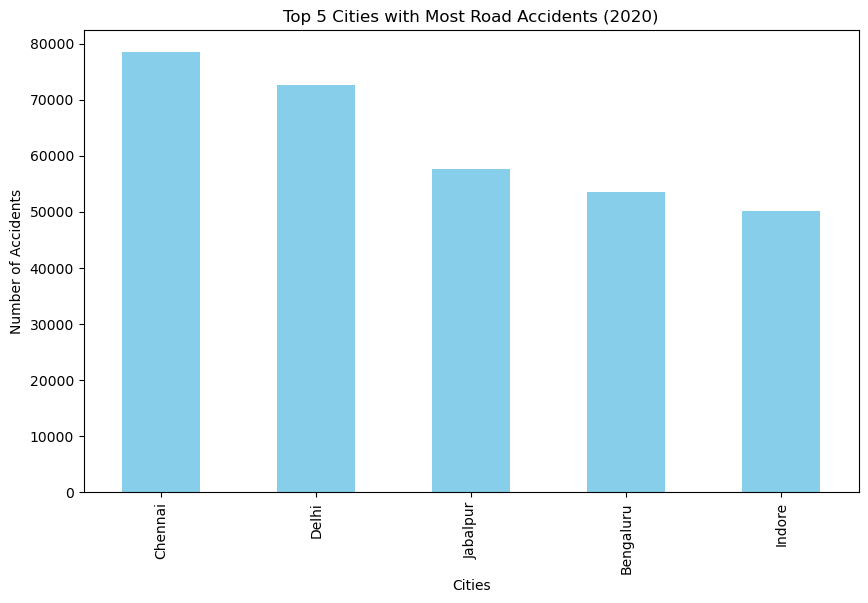

In [15]:
# Top 5 Cities with the most accidents
top_5_cities = total_accidents_per_city.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10,6))
top_5_cities.plot(kind='bar', color='skyblue')
plt.title('Top 5 Cities with Most Road Accidents (2020)')
plt.xlabel('Cities')
plt.ylabel('Number of Accidents')
plt.show()


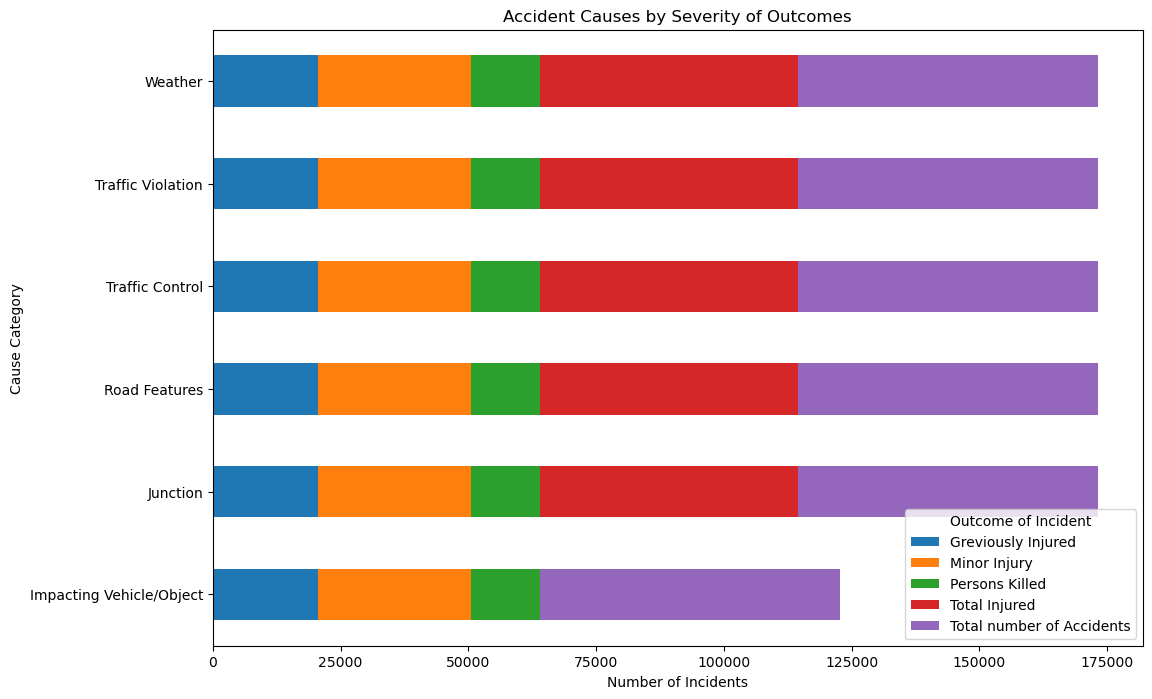

In [16]:
# Group accidents by cause and outcome for severity analysis
cause_severity = df_cleaned.groupby(['Cause category', 'Outcome of Incident'])['Count'].sum().unstack()

# Plotting the relationship between cause category and severity
cause_severity.plot(kind='barh', stacked=True, figsize=(12,8))
plt.title('Accident Causes by Severity of Outcomes')
plt.xlabel('Number of Incidents')
plt.ylabel('Cause Category')
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


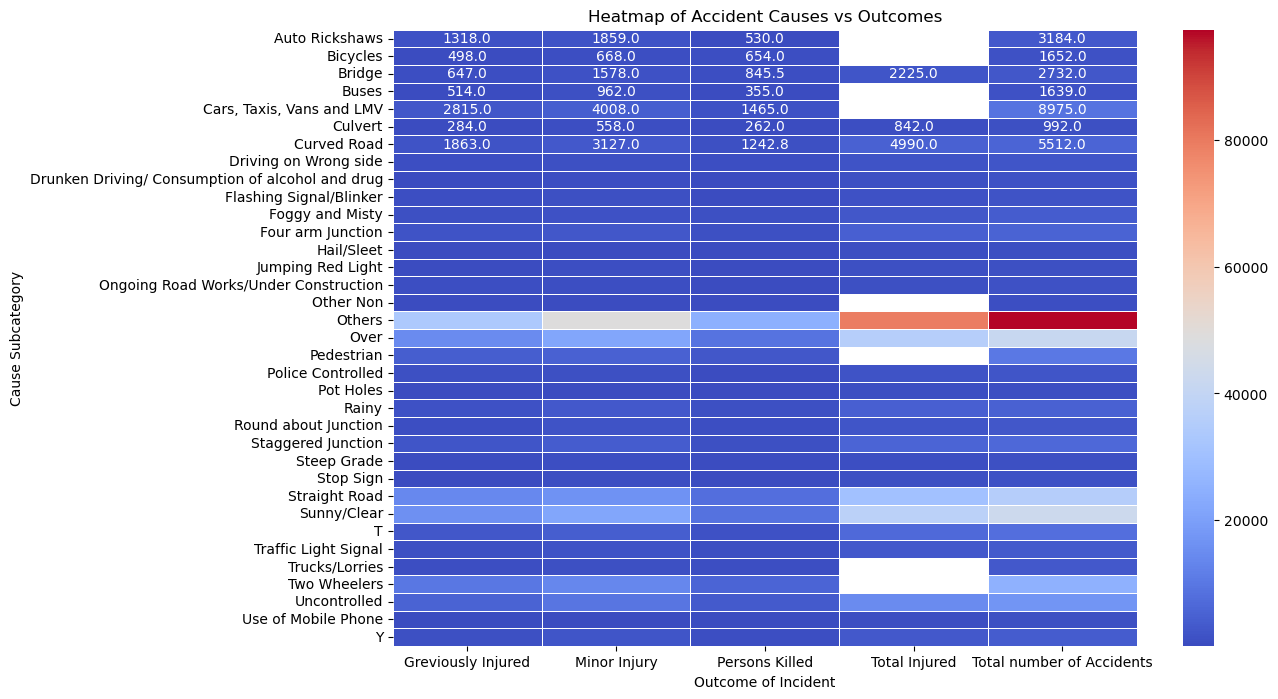

In [17]:
import seaborn as sns

# Creating a heatmap for detailed cause vs outcome analysis
cause_outcome_heatmap = df_cleaned.pivot_table(index='Cause Subcategory', columns='Outcome of Incident', values='Count', aggfunc='sum')

plt.figure(figsize=(12,8))
sns.heatmap(cause_outcome_heatmap, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Accident Causes vs Outcomes')
plt.xlabel('Outcome of Incident')
plt.ylabel('Cause Subcategory')
plt.show()


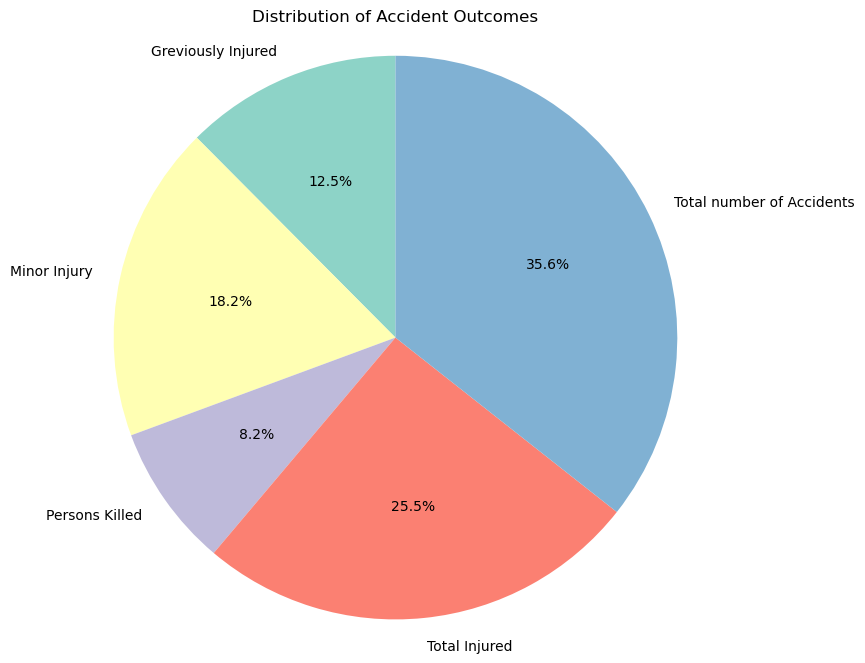

In [18]:
# Summing up the total number of incidents per outcome category
outcome_counts = df_cleaned.groupby('Outcome of Incident')['Count'].sum()

# Plotting the pie chart for outcomes
plt.figure(figsize=(8,8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Distribution of Accident Outcomes')
plt.axis('equal')
plt.show()


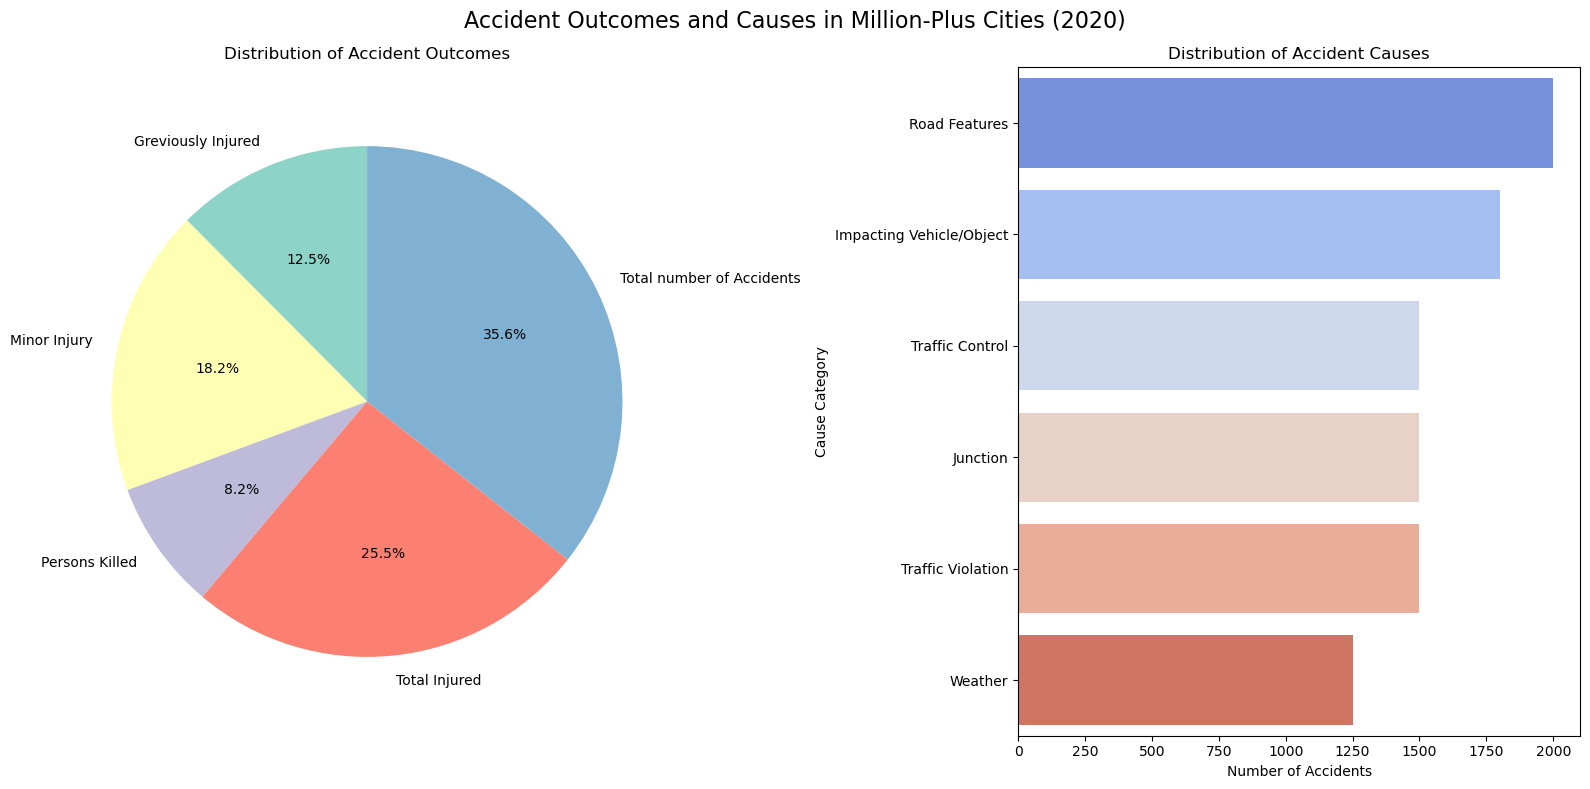

In [19]:
# Creating subplots for the pie chart and the bar chart
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 1. Pie chart for accident outcomes
axes[0].pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
axes[0].set_title('Distribution of Accident Outcomes')
axes[0].axis('equal')  # Ensure the pie chart is a circle

# 2. Bar chart for accident causes
sns.countplot(y='Cause category', data=df_cleaned, order=df_cleaned['Cause category'].value_counts().index, ax=axes[1], palette='coolwarm')
axes[1].set_title('Distribution of Accident Causes')
axes[1].set_xlabel('Number of Accidents')
axes[1].set_ylabel('Cause Category')

# Set the overall title for both subplots
plt.suptitle('Accident Outcomes and Causes in Million-Plus Cities (2020)', fontsize=16)

# Adjust layout for better appearance
plt.tight_layout()

# Show the combined plots
plt.show()

In [25]:
# Create a new column to categorize counts into bins
def categorize_count(count):
    if count == 0:
        return 'No Incidents'
    elif count < 100:
        return 'Low'
    elif count < 500:
        return 'Medium'
    else:
        return 'High'

df_cleaned['Count Category'] = df_cleaned['Count'].apply(categorize_count)

# Check the new column
print(df_cleaned['Count Category'].value_counts())


Count Category
Low             5005
No Incidents    2581
Medium          1485
High             479
Name: count, dtype: int64


In [26]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_cleaned['Cause category'], df_cleaned['Outcome of Incident'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


Chi-square statistic: 429.7499999999999
P-value: 1.3470203735143473e-78


In [27]:
# Create a pivot table for analysis
pivot_table = df_cleaned.pivot_table(index='Cause category', columns='Outcome of Incident', values='Count', aggfunc='sum', fill_value=0)

# Display the pivot table
print(pivot_table)


Outcome of Incident       Greviously Injured  Minor Injury  Persons Killed  \
Cause category                                                               
Impacting Vehicle/Object             20532.0       29983.0         13542.0   
Junction                             20532.0       29983.0         13542.0   
Road Features                        20532.0       29983.0         13542.0   
Traffic Control                      20532.0       29983.0         13542.0   
Traffic Violation                    20532.0       29983.0         13542.0   
Weather                              20532.0       29983.0         13542.0   

Outcome of Incident       Total Injured  Total number of Accidents  
Cause category                                                      
Impacting Vehicle/Object            0.0                    58736.0  
Junction                        50515.0                    58736.0  
Road Features                   50515.0                    58736.0  
Traffic Control               

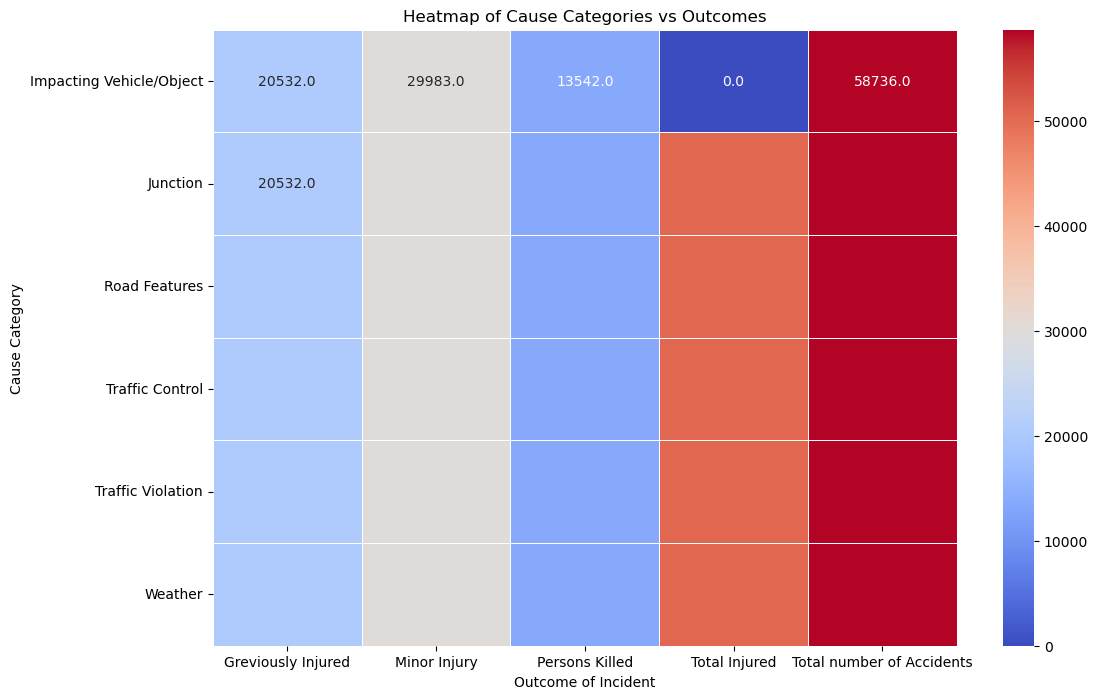

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap from the pivot table
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Cause Categories vs Outcomes')
plt.xlabel('Outcome of Incident')
plt.ylabel('Cause Category')
plt.show()
